In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
from scipy.cluster import hierarchy as sch
from matplotlib import pyplot as plt
from copy import deepcopy
%matplotlib inline

In [2]:
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

sc.logging.print_header()

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [3]:
import anndata

In [3]:
vizgen_dir = Path().resolve() /'home'/'jupyter'/'region_5'
adata = sq.read.vizgen(
    path='/home/jupyter/region_5',
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    #transformation_file="micron_to_mosaic_pixel_transform.csv",
)

In [5]:
ser_exp = adata.to_df().sum(axis=1)
adata.obs['ExpressionCounts'] = ser_exp

In [7]:
adata

AnnData object with n_obs × n_vars = 48789 × 228
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts'
    uns: 'spatial'
    obsm: 'spatial'

In [8]:
sc.pp.filter_cells(adata, min_counts=10)
#sc.pp.filter_genes(adata, min_cells=10)

In [23]:
adata

AnnData object with n_obs × n_vars = 39246 × 228
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts', 'n_counts', 'leiden', 'Cell_Type', 'Cluster'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 't-test', 'Cell_Type_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [10]:
adata.layers["counts"] = adata.X.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

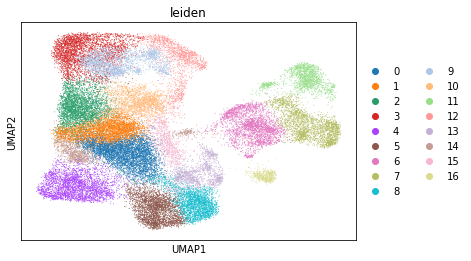

In [11]:
sc.pl.umap(
    adata,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

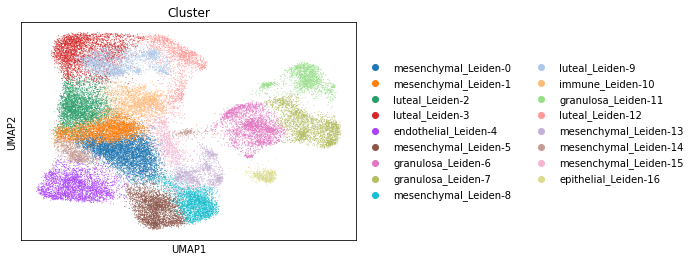

In [23]:
sc.pl.umap(
    adata,
    color=[
        "Cluster",
    ],
    wspace=0.4,
    #figsize=(15, 15),
    cmap = 'tab20b',
)

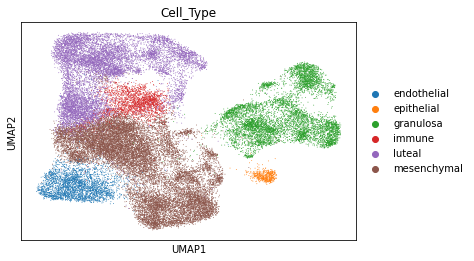

In [24]:
sc.pl.umap(
    adata,
    color=[
        "Cell_Type",
    ],
    wspace=0.4,
    #figsize=(15, 15),
    cmap = 'tab20b',
)

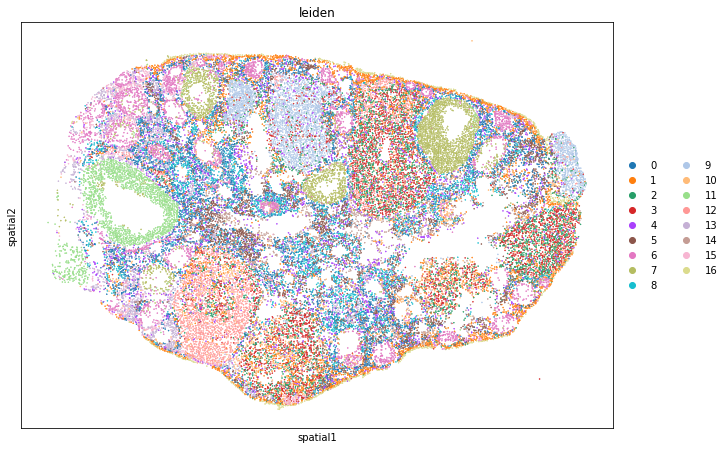

In [11]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    size=0.5,
    library_id='spatial',
    figsize=(10, 10)
)

In [12]:
df_ref_panel_ini = pd.read_excel('/home/jupyter/Marker_0hrs.xlsx', index_col=0)
#df_ref_panel = df_ref_panel_ini.iloc[1:,2]
df_ref_panel = df_ref_panel_ini[df_ref_panel_ini.iloc[:, 2].notnull()]
df_ref_panel

Source Mouse Specific?   \
Gene                                                                          
Aldh1a1  gerton ; Richards ; ruptured/unruptured, post hCG              NaN   
Amh                                   GC_markers_YYcurated              NaN   
Amhr2                                 GC_markers_YYcurated              NaN   
Apoe                                 gerton / PNAS / Britt              NaN   
Bhmt                                        gerton dataset              NaN   
Ccl5                                 gerton / PNAS / Britt              NaN   
Cd14                                 gerton / PNAS / Britt              NaN   
Cd74                                 gerton / PNAS / Britt              NaN   
Cldn5                     gerrton dataset and PNAS dataset              NaN   
Cyp17a1                                      Richards_Data              NaN   
Egfl7                     gerrton dataset and PNAS dataset              NaN   
Epcam                      gerton / Britt ; gerton dataset              NaN   
Fst      GC_markers_Yycurated ; ruptured/unruptured, po...              NaN   
Gm2a                                                gerton              NaN   
H2-Aa                                gerton / PNAS / Britt              NaN   
H2-Ab1                               gerton / PNAS / Britt              NaN   
Hao2                                                gerton              NaN   
Inha     GC_markers_Yycurated ; ruptured/unruptured, no...              NaN   
Krt18                                       gerton / Britt              NaN   
Krt19                GC_markers_Yycurated ; gerton / Britt              NaN   
Krt7                                        gerton / Britt              NaN   
Lhcgr       gerton dataset ; ruptured/unruptured, post hCG              NaN   
Ly6e                                        gerton / Britt              NaN   
Mgarp                                               gerton              NaN   
Nap1l5                         ruptured/unruptured, no hCG              NaN   
Pecamp1                                     gerton dataset              Yes   
Prlr                                                gerton              NaN   
Rspo1                                 GC_markers_YYcurated              NaN   
S100a9                                       PNAS dataset               NaN   
Tom1l1                                       Richards_Data              NaN   
Upk3b                                 GC_markers_YYcurated              NaN   

                      NOTES  \
Gene                          
Aldh1a1        mesenchymal    
Amh                GC_Small   
Amhr2              GC_Small   
Apoe     immune: macs/monos   
Bhmt               GC_Small   
Ccl5     immune: macs/monos   
Cd14     immune: macs/monos   
Cd74     immune: macs/monos   
Cldn5           endothelial   
Cyp17a1        mesenchymal    
Egfl7          endothelial    
Epcam           epithelial    
Fst                GC_Small   
Gm2a                 luteal   
H2-Aa    immune: macs/monos   
H2-Ab1   immune: macs/monos   
Hao2           mesenchymal    
Inha               GC_Small   
Krt18           epithelial    
Krt19           epithelial    
Krt7            epithelial    
Lhcgr              GC_Small   
Ly6e            epithelial    
Mgarp          mesenchymal    
Nap1l5             GC_Small   
Pecamp1         endothelial   
Prlr                 luteal   
Rspo1           epithelial    
S100a9                        
Tom1l1             GC_Small   
Upk3b           epithelial    

                                          Gene Description  \
Gene                                                         
Aldh1a1                                                NaN   
Amh                                 anti-Mullerian hormone   
Amhr2               anti-Mullerian hormone receptor type 2   
Apoe                                                   NaN   
Bhmt                                            

In [13]:
marker_genes = df_ref_panel.index.tolist()
meta_gene = deepcopy(adata.var)
common_marker_genes = list(set(meta_gene.index.tolist()).intersection(marker_genes))
meta_gene.loc[common_marker_genes, 'Markers'] = df_ref_panel.loc[common_marker_genes, 'NOTES']
meta_gene['Markers'] = meta_gene['Markers'].apply(lambda x: 'N.A.' if 'marker' not in str(x) else x)
meta_gene['Markers'].value_counts()

N.A.    228
Name: Markers, dtype: int64

In [14]:
ser_counts = adata.obs['leiden'].value_counts()
ser_counts.name = 'cell counts'
meta_leiden = pd.DataFrame(ser_counts)

cat_name = 'leiden'
sig_leiden = pd.DataFrame(columns=adata.var_names, index=adata.obs[cat_name].cat.categories)
for clust in adata.obs[cat_name].cat.categories:
    sig_leiden.loc[clust] = adata[adata.obs[cat_name].isin([clust]),:].X.mean(0)
sig_leiden = sig_leiden.transpose()
leiden_clusters = ['Leiden-' + str(x) for x in sig_leiden.columns.tolist()]
sig_leiden.columns = leiden_clusters
meta_leiden.index = sig_leiden.columns.tolist()
meta_leiden['leiden'] = pd.Series(meta_leiden.index.tolist(), index=meta_leiden.index.tolist())

In [15]:
meta_leiden

cell counts     leiden
Leiden-0          4514   Leiden-0
Leiden-1          3489   Leiden-1
Leiden-2          3057   Leiden-2
Leiden-3          3008   Leiden-3
Leiden-4          2948   Leiden-4
Leiden-5          2894   Leiden-5
Leiden-6          2788   Leiden-6
Leiden-7          2426   Leiden-7
Leiden-8          2393   Leiden-8
Leiden-9          2358   Leiden-9
Leiden-10         2079  Leiden-10
Leiden-11         1598  Leiden-11
Leiden-12         1590  Leiden-12
Leiden-13         1428  Leiden-13
Leiden-14         1220  Leiden-14
Leiden-15          942  Leiden-15
Leiden-16          514  Leiden-16

In [16]:
meta_gene = pd.DataFrame(index=sig_leiden.index.tolist())
meta_gene['info'] = pd.Series('', index=meta_gene.index.tolist())
meta_gene['Markers'] = pd.Series('N.A.', index=sig_leiden.index.tolist())
meta_gene.loc[common_marker_genes, 'Markers'] = df_ref_panel.loc[common_marker_genes, 'NOTES']

meta_leiden['Cell_Type'] = pd.Series('N.A.', index=meta_leiden.index.tolist())
num_top_genes = 10
for inst_cluster in sig_leiden.columns.tolist():
  top_genes = sig_leiden[inst_cluster].sort_values(ascending=False).index.tolist()[:num_top_genes]

  inst_ser = meta_gene.loc[top_genes, 'Markers']
  inst_ser = inst_ser[inst_ser != 'N.A.']
  ser_counts = inst_ser.value_counts()

  max_count = ser_counts.max()

  max_cat = '_'.join(sorted(ser_counts[ser_counts == max_count].index.tolist()))
  max_cat = max_cat.replace(' marker', '').replace(' ', '-')

  print(inst_cluster, max_cat)
  meta_leiden.loc[inst_cluster, 'Cell_Type'] = max_cat

Leiden-0 mesenchymal-
Leiden-1 luteal
Leiden-2 luteal
Leiden-3 luteal
Leiden-4 endothelial_endothelial-_epithelial-
Leiden-5 mesenchymal-
Leiden-6 GC_Small_mesenchymal-
Leiden-7 GC_Small
Leiden-8 mesenchymal-
Leiden-9 mesenchymal-
Leiden-10 immune:-macs/monos
Leiden-11 GC_Small_mesenchymal-
Leiden-12 luteal
Leiden-13 mesenchymal-
Leiden-14 
Leiden-15 immune:-macs/monos_luteal_mesenchymal-
Leiden-16 epithelial-


In [17]:
n = 0

for inst_cluster in sig_leiden.columns.tolist():
    top_genes = sig_leiden[inst_cluster].sort_values(ascending=False).index.tolist()[:num_top_genes]
    print(top_genes)

['Col1a2', 'Col3a1', 'Col1a1', 'Hmgcs2', 'Dcn', 'Mfap4', 'Idh1', 'Aldh1a1', 'Dhrs3', 'Cyp11a1']
['Col1a2', 'Col3a1', 'Col1a1', 'Dcn', 'Hmgcs2', 'Idh1', 'Mfap4', 'C1s1', 'Fzd1', 'Gm2a']
['Col1a2', 'Col3a1', 'Star', 'Col1a1', 'Idh1', 'Cyp11a1', 'Gm2a', 'Fdx1', 'Dcn', 'Hmgcs2']
['Star', 'Gm2a', 'Cyp11a1', 'Idh1', 'Fdx1', 'Sfrp4', 'Rgcc', 'Runx2', 'Prlr', 'Ptges']
['Pecam1', 'Ly6e', 'Cldn5', 'Idh1', 'Col1a2', 'Egfl7', 'Col3a1', 'Cyp11a1', 'Star', 'Dhrs3']
['Cyp11a1', 'Mgarp', 'Idh1', 'Inha', 'Aldh1a1', 'Hmgcs2', 'Fdx1', 'Star', 'Hao2', 'Aldh1a2']
['Inha', 'Hmgcs2', 'Pcsk6', 'Rasd1', 'Idh1', 'Ptges', 'Serpine2', 'Dhrs3', 'Aldh1a1', 'Kitl']
['Inha', 'Serpine2', 'Nap1l5', 'Fshr', 'Inhba', 'Idh1', 'Mro', 'Hmgcs2', 'Ptges', 'Dhrs3']
['Cyp17a1', 'Cyp11a1', 'Aldh1a1', 'Idh1', 'Hmgcs2', 'Fdx1', 'Inha', 'Mgarp', 'Star', 'Hao2']
['Gm2a', 'Idh1', 'Fdx1', 'Star', 'Cyp11a1', 'Mgarp', 'Runx2', 'Sfrp4', 'Hao2', 'Hmgcs2']
['Apoe', 'Col1a2', 'Col3a1', 'Idh1', 'Gm2a', 'Col1a1', 'Dhrs3', 'Cyp11a1', 'Star', '

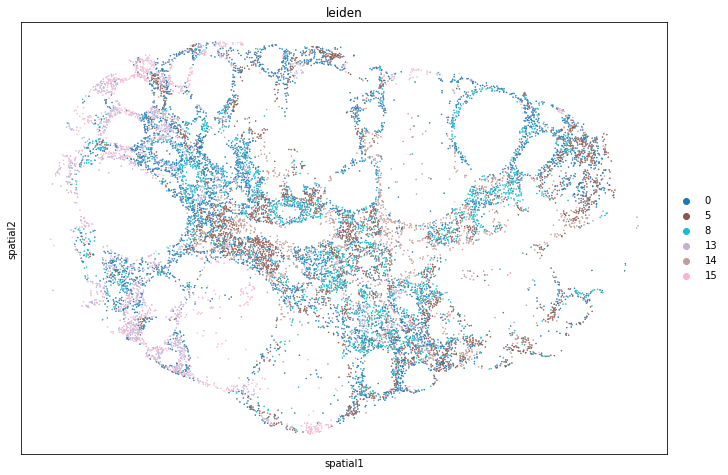

In [83]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['0','5','8','13','15','14'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

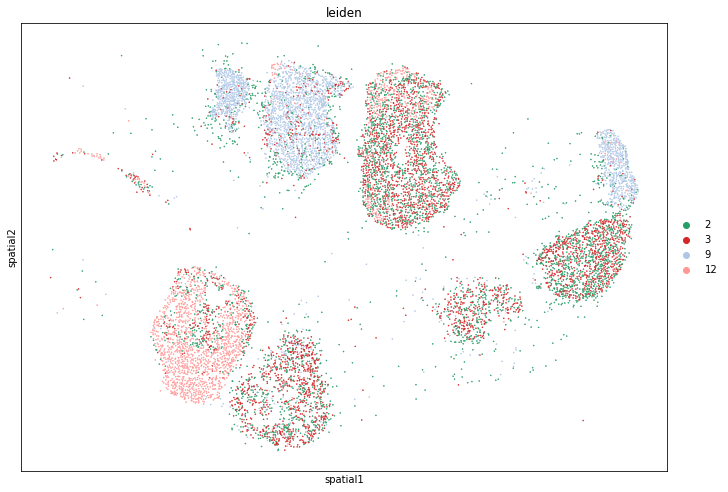

In [70]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['2','3','9','12'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

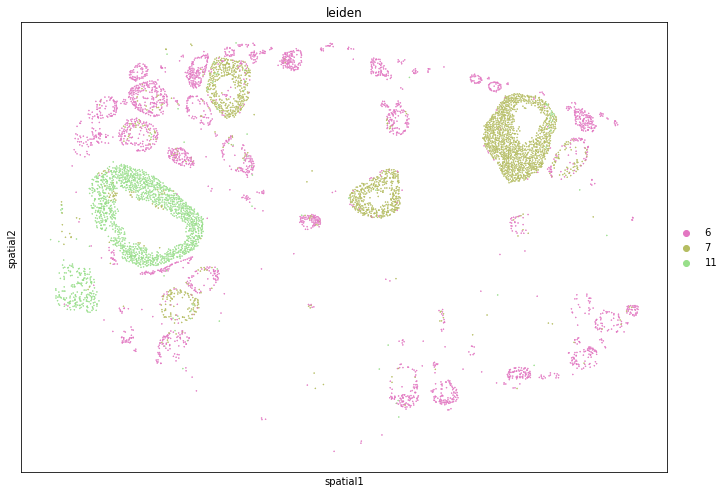

In [73]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['6','7','11'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

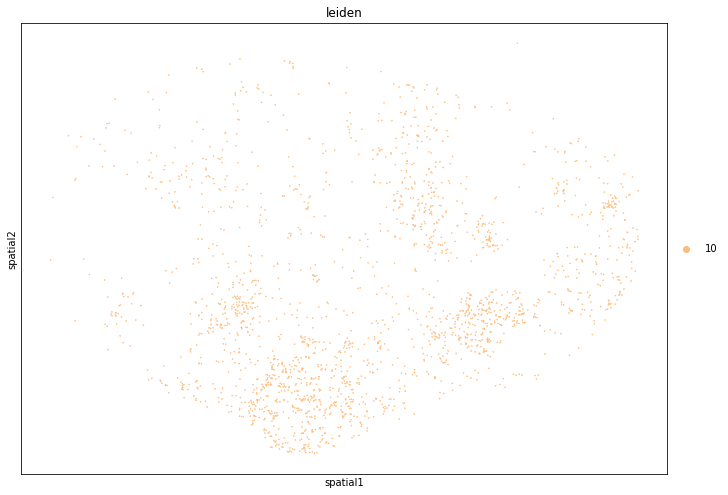

In [74]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['10'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

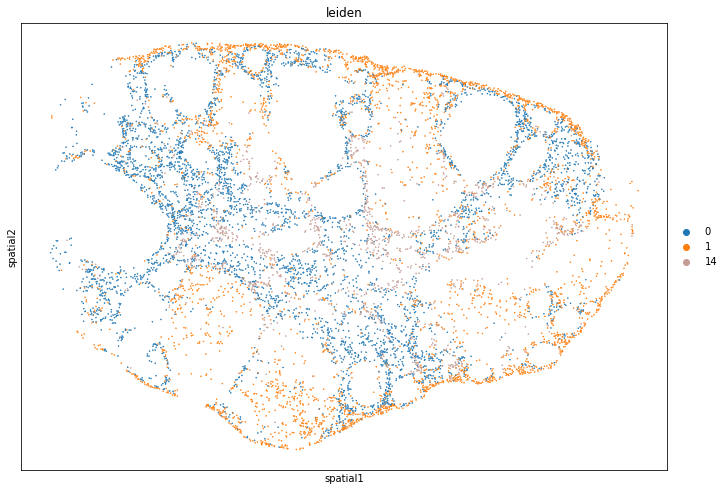

In [6]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['0','1','14'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

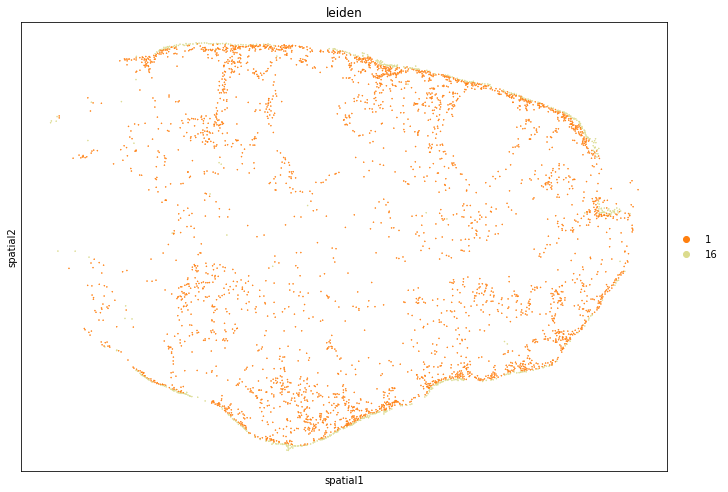

In [81]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['16','1'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

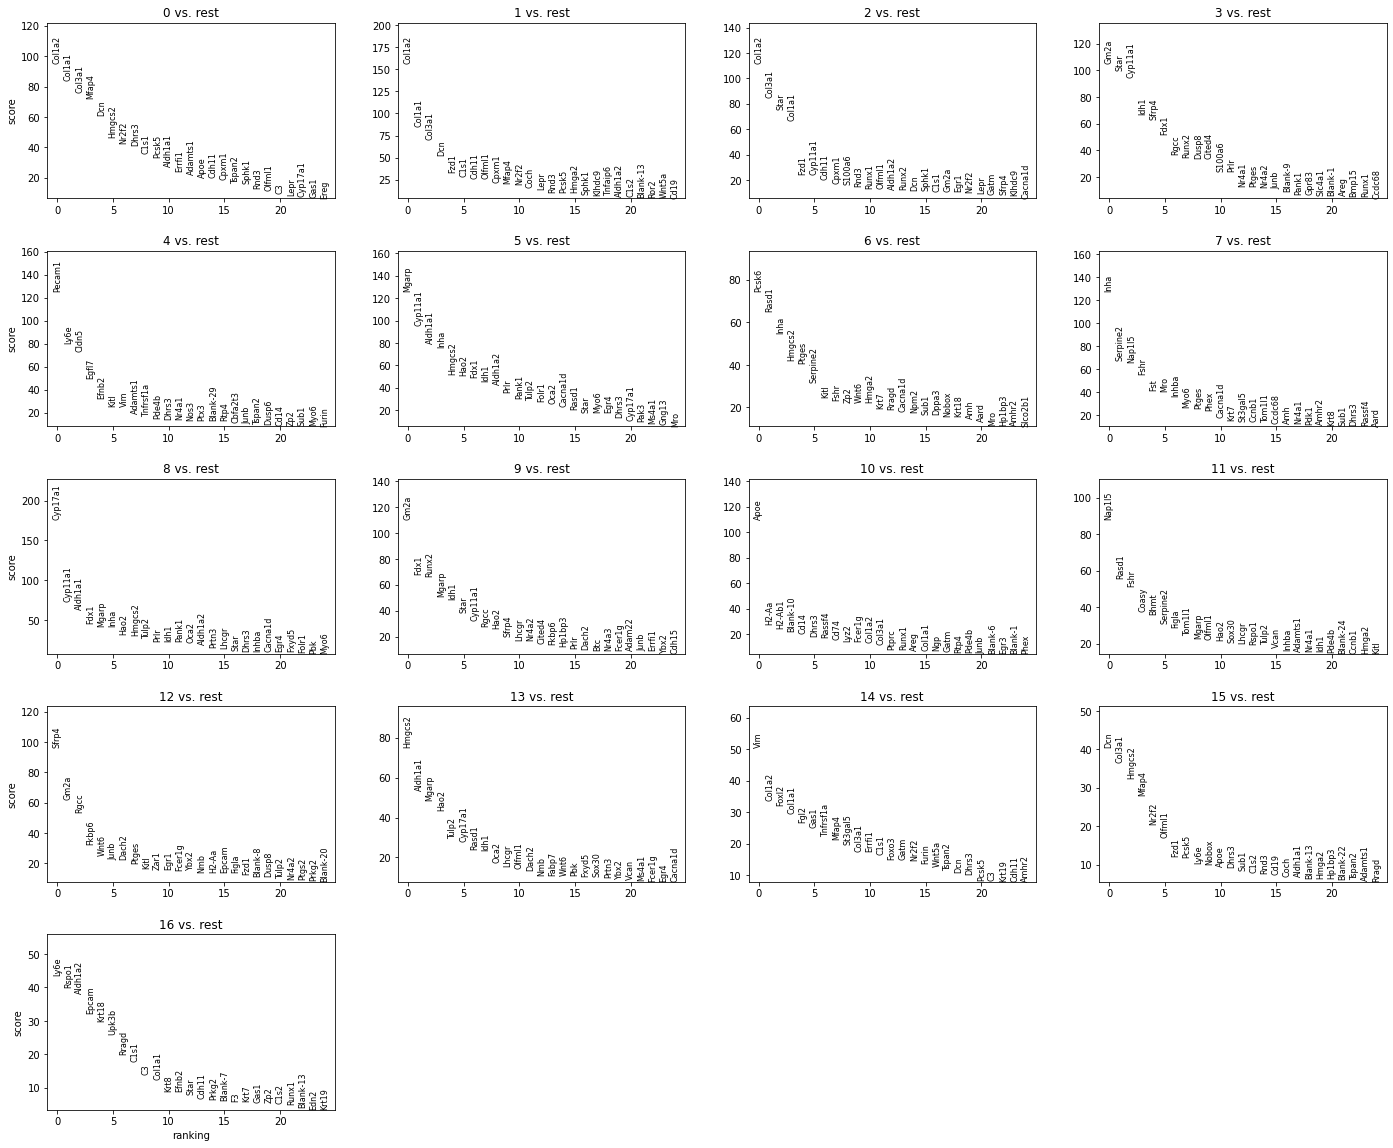

In [18]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test")
0 - stroma
1 - stroma
5 - theca
8 - theca
13 - theca
14 - stroma
15 - stroma

In [19]:
def get_new_value(leiden_value):
    if leiden_value in ['Leiden-0', 'Leiden-14','Leiden-15','Leiden-1']:
        return 'stroma'
    elif leiden_value in [ 'Leiden-5','Leiden-8','Leiden-13']:
        return 'theca'
    elif leiden_value in ['Leiden-2','Leiden-3','Leiden-9','Leiden-12']:
        return 'luteal'
    elif leiden_value in ['Leiden-16']:
        return 'epithelial'
    elif leiden_value in ['Leiden-6', 'Leiden-7','Leiden-11']:
        return 'granulosa'
    elif leiden_value in ['Leiden-10']:
        return 'immune'
    elif leiden_value in ['Leiden-4']:
        return 'endothelial'
    else:
        return 'unknown1'

# apply the function to each row of the 'Leiden' column using the apply() method
meta_leiden['Cell_Type'] = meta_leiden['leiden'].apply(lambda x: get_new_value(x))

print(meta_leiden)

           cell counts     leiden    Cell_Type
Leiden-0          4514   Leiden-0       stroma
Leiden-1          3489   Leiden-1       stroma
Leiden-2          3057   Leiden-2       luteal
Leiden-3          3008   Leiden-3       luteal
Leiden-4          2948   Leiden-4  endothelial
Leiden-5          2894   Leiden-5        theca
Leiden-6          2788   Leiden-6    granulosa
Leiden-7          2426   Leiden-7    granulosa
Leiden-8          2393   Leiden-8        theca
Leiden-9          2358   Leiden-9       luteal
Leiden-10         2079  Leiden-10       immune
Leiden-11         1598  Leiden-11    granulosa
Leiden-12         1590  Leiden-12       luteal
Leiden-13         1428  Leiden-13        theca
Leiden-14         1220  Leiden-14       stroma
Leiden-15          942  Leiden-15       stroma
Leiden-16          514  Leiden-16   epithelial


In [20]:
meta_leiden['name'] = meta_leiden.apply(lambda x: x['Cell_Type'] + '_' + x['leiden'] , axis=1)
leiden_names = meta_leiden['name'].values.tolist()
meta_leiden.index = leiden_names


# transfer cell type labels to single cells
leiden_to_cell_type = deepcopy(meta_leiden)
leiden_to_cell_type.set_index('leiden', inplace=True)
leiden_to_cell_type.index.name = None

adata.obs['Cell_Type'] = adata.obs['leiden'].apply(lambda x: leiden_to_cell_type.loc['Leiden-' + str(x), 'Cell_Type'])
adata.obs['Cluster'] = adata.obs['leiden'].apply(lambda x: leiden_to_cell_type.loc['Leiden-' + str(x), 'name'])

In [21]:
set(adata.obs['Cluster'])

{'endothelial_Leiden-4',
 'epithelial_Leiden-16',
 'granulosa_Leiden-11',
 'granulosa_Leiden-6',
 'granulosa_Leiden-7',
 'immune_Leiden-10',
 'luteal_Leiden-12',
 'luteal_Leiden-2',
 'luteal_Leiden-3',
 'luteal_Leiden-9',
 'mesenchymal_Leiden-0',
 'mesenchymal_Leiden-1',
 'mesenchymal_Leiden-13',
 'mesenchymal_Leiden-14',
 'mesenchymal_Leiden-15',
 'mesenchymal_Leiden-5',
 'mesenchymal_Leiden-8'}

In [21]:
palette = ["#e00089",
"#9e2409",
"#ff7d3e",
'#b151d8',
'#f2b1ed',
'#006ec9',
'#f9b69f']
adata.uns['Cell_Type_colors'] = palette

In [4]:
adata = anndata.read_h5ad('/home/jupyter/region5_0824.h5ad')

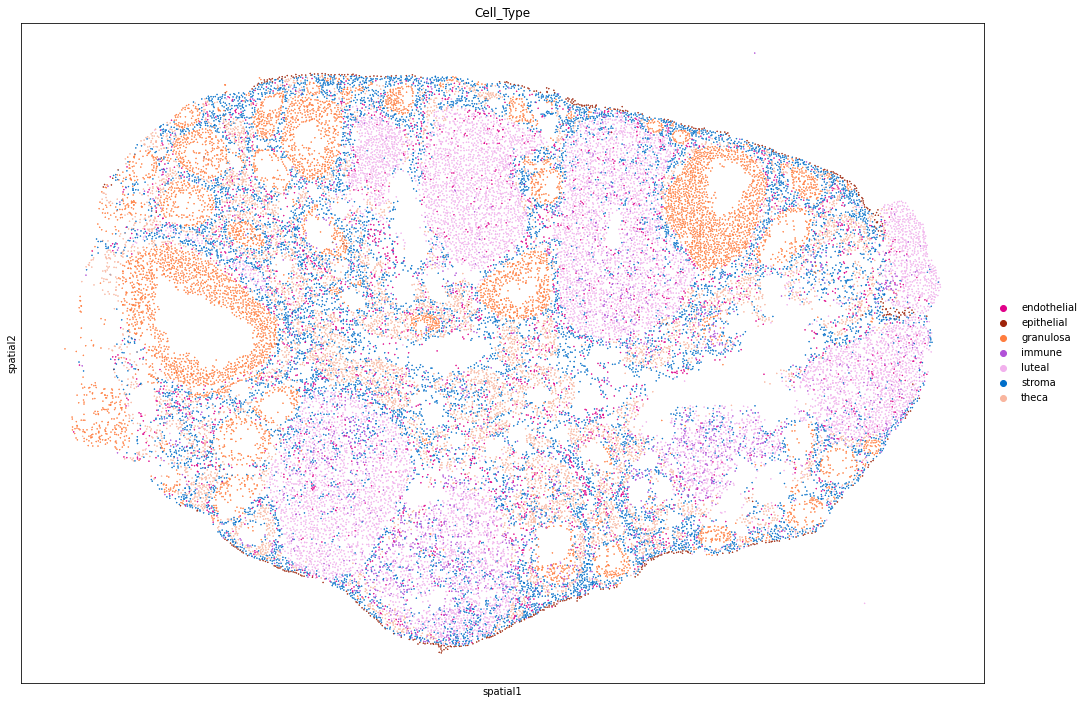

In [24]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Cell_Type",
    size=0.5,
    library_id='spatial',
    figsize=(15, 15),
    cmap = 'tab20b',
)

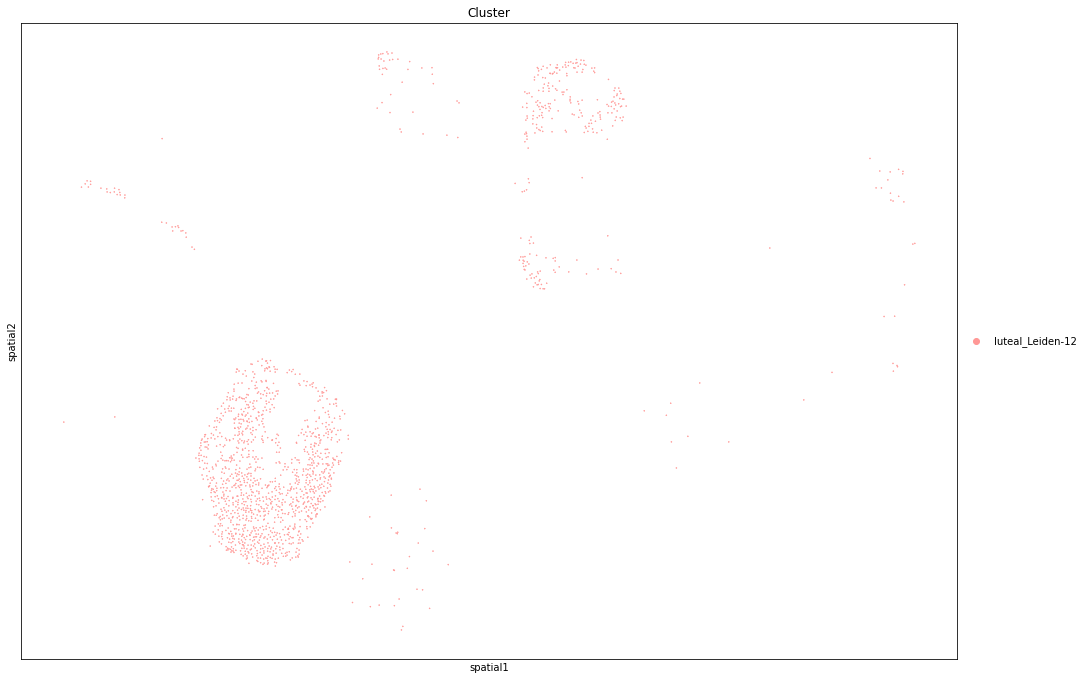

In [25]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Cluster",
    groups = ['luteal_Leiden-12'],
    size=0.5,
    library_id='spatial',
    figsize=(15, 15),
    cmap = 'tab20b',
)

  0%|          | 0/1000 [00:00<?, ?/s]

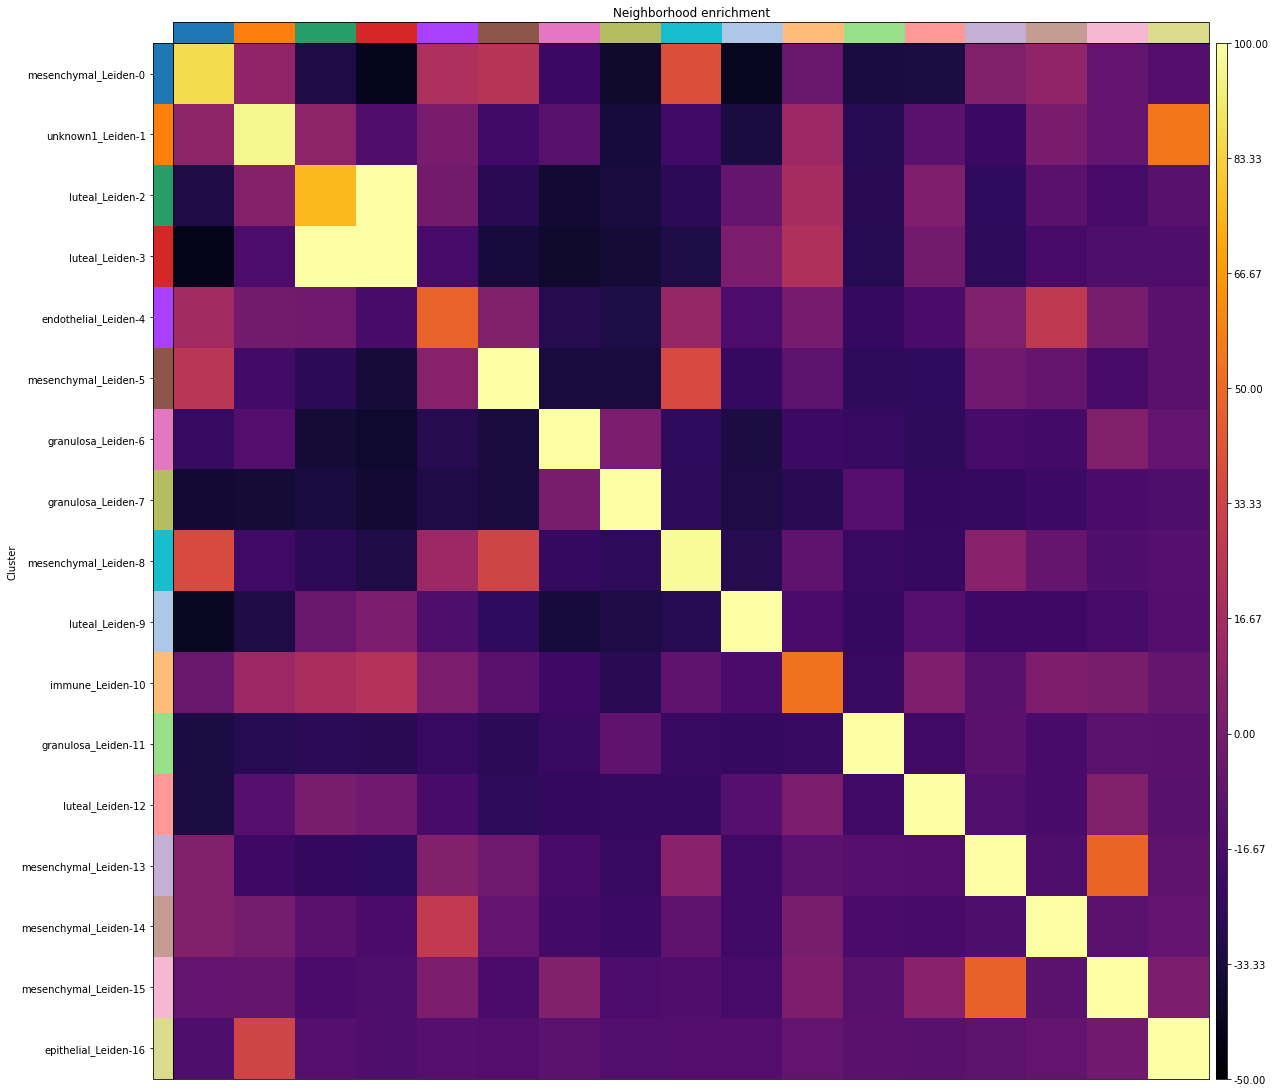

In [96]:
sq.gr.spatial_neighbors(adata, coord_type="generic", spatial_key="spatial")
sq.gr.nhood_enrichment(adata, cluster_key="Cluster")
sq.pl.nhood_enrichment(adata, cluster_key="Cluster", cmap="inferno", vmin=-50, vmax=100, figsize=(15,15))

In [97]:
sq.gr.spatial_autocorr(adata, mode="moran")
num_view = 12
top_autocorr = adata.uns['moranI']['I'].sort_values(ascending=False).head(num_view).index.tolist()
bot_autocorr = adata.uns['moranI']['I'].sort_values(ascending=True).head(num_view).index.tolist()

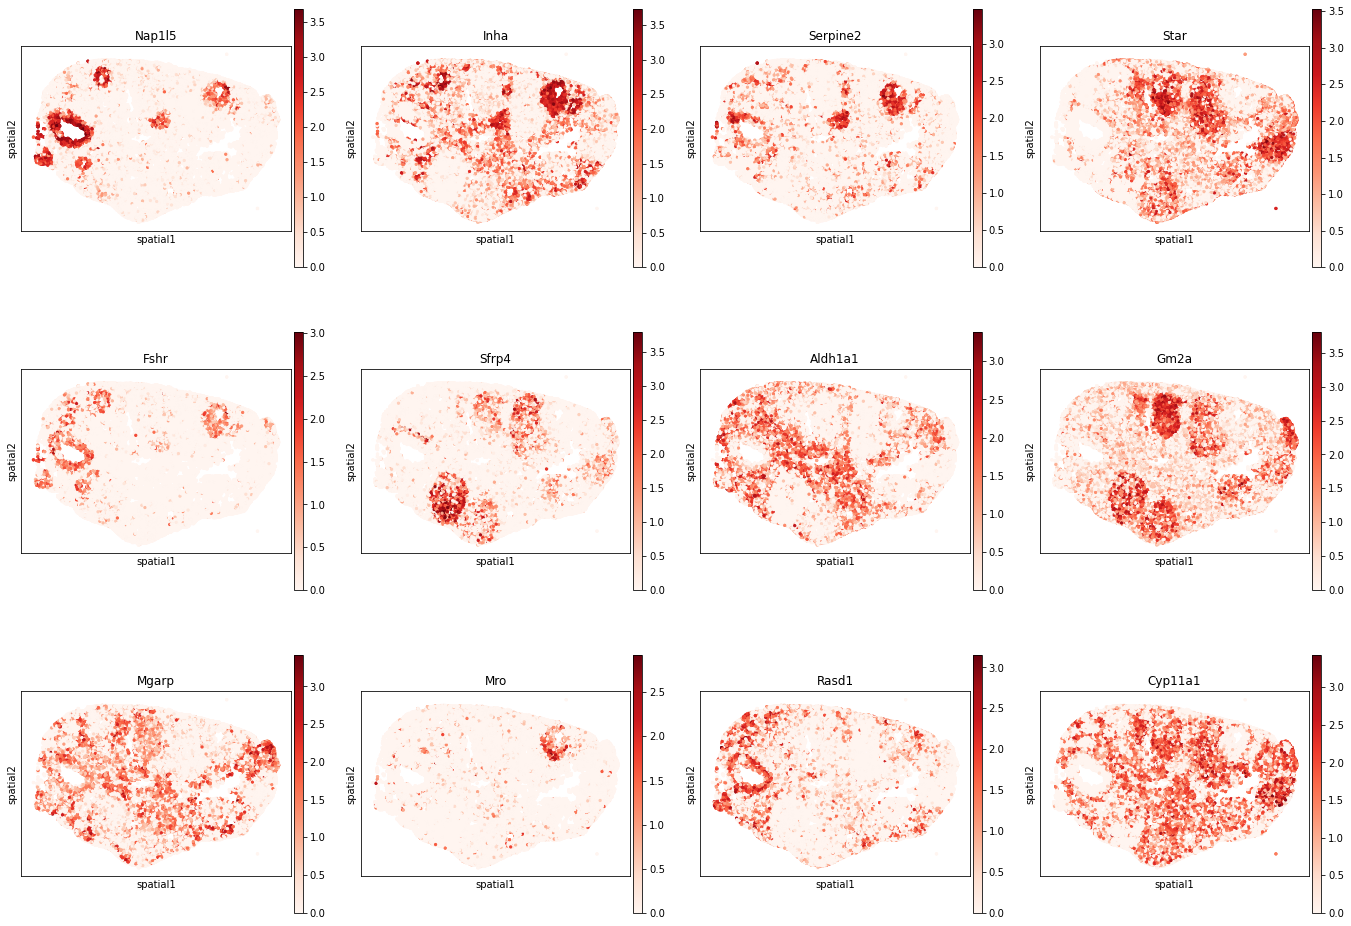

In [98]:
sq.pl.spatial_scatter(
    adata,
    color=top_autocorr,
    size=20,
    cmap='Reds',
    img=False,
    figsize=(5,5),
    shape = None,
    library_id='spatial',
)

In [99]:
sq.gr.centrality_scores(adata, cluster_key="Cluster")

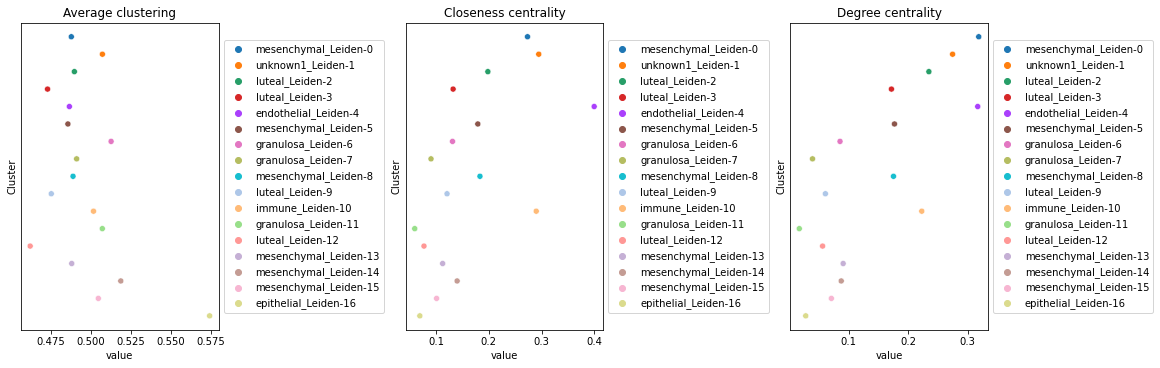

In [100]:
sq.pl.centrality_scores(adata, cluster_key="Cluster", figsize=(16, 5))

In [26]:
adata.write('/home/jupyter/region_5/processed_region5.h5ad')

In [ ]:
gsutil cp processed_region5.h5ad gs://fc-7458d22e-a85c-48ad-ae70-9129add71bcc/output/202211141635_MouseOvaryTMArep1-JNCM14Nov22_VMSC00301/region_5